# Barro salesData analysis

importing panda library, numpy library and matplotlib library into my python environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading the sales data that is to be analysed into my python environment

In [2]:
pd.read_csv(r"D:\Train.csv")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


saved the salesdata with variable name called "data" 

In [3]:
data = pd.read_csv(r"D:\Train.csv")

checking for empty or null values in the salesdata

In [4]:
data.isnull().values.any()

True

this shows that are colmnns with missing or empty values

In [6]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Here, item_weight and item_size contains missing values and since i  will be needing these columns to solve questions in this dataset, it is not advisable to remove these columns, so i need to fill in the missing in these columns using the fillna()

since item_weight contains numerical data, i can use either the mean or the median of the values in item_weight column to fill in the empty values we have in the column

In [7]:
data['Item_Weight'].fillna(data["Item_Weight"].mean(),inplace=True)


I checked if the code is correct and if there are empty values left in item_weight column using the isnull()

In [8]:
data['Item_Weight'].isnull().sum()

0

since outlet_size contains categorical data, i used the mode() to fill in the empty columns we have in the column

In [9]:
data['Outlet_Size'].fillna(data["Outlet_Size"].mode()[0],inplace=True)

I checked if the code is correct and if there are empty values left in item_size column using the isnull()

In [10]:
data['Outlet_Size'].isnull().sum()

0

I checked if there is any null values left in the salesdata

In [11]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
data.isnull().values.any()

False

# Now, the salesdata is ready for analysis

#I checked salesdata information using the code below

I checked the column names in this salesdata using the code below

In [13]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

I used the info() to check the number of columns,the range index, the data type in each column and the memory usage in this salesdata

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


I used the describe() to check the count, mean, min , the 25 percentile, 50 percentile, 75 percentile and the max number

In [14]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Question 1:Does the outlet type(grocery store or supermarket) have any impact on the overall sales?

I extracted the item_Type column

In [16]:
 data['Outlet_Type']

0       Supermarket Type1
1       Supermarket Type2
2       Supermarket Type1
3           Grocery Store
4       Supermarket Type1
              ...        
8518    Supermarket Type1
8519    Supermarket Type1
8520    Supermarket Type1
8521    Supermarket Type2
8522    Supermarket Type1
Name: Outlet_Type, Length: 8523, dtype: object

I groupby item_outlet_Sales and sum is using sum()

In [17]:
data.groupby("Item_Outlet_Sales").sum()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Outlet_Sales,,,,
33.2900,18.605000,0.064411,66.2800,3996
33.9558,12.857645,0.134328,35.0558,1985
34.6216,12.857645,0.073077,34.3216,1985
35.2874,7.155000,0.281510,33.8874,1998
36.6190,28.207645,0.048012,69.8380,3983
...,...,...,...,...
10306.5840,12.857645,0.030693,228.0352,1985
10993.6896,12.857645,0.088840,254.2672,1985
11445.1020,12.857645,0.000000,253.0356,1985


I groupby Outlet_Type and sum the Item_Outlet_Sales

In [33]:
data.groupby("Outlet_Type")["Item_Outlet_Sales"].sum()

Outlet_Type
Grocery Store        3.680343e+05
Supermarket Type1    1.291734e+07
Supermarket Type2    1.851823e+06
Supermarket Type3    3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

I groupby Outlet_type and sum the Item_Outlet_Sales and used it to plot a bar graph

<AxesSubplot:xlabel='Outlet_Type'>

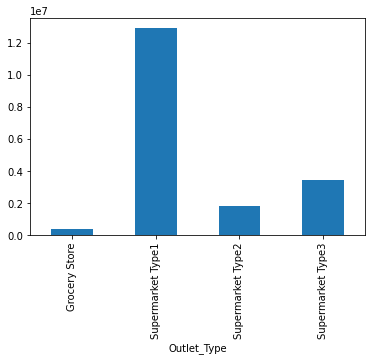

In [25]:
data.groupby("Outlet_Type")["Item_Outlet_Sales"].sum().plot(kind = 'bar')

Solution 1: From the above output,supermarket_type 1 makes the highest sales and this increases the overall sales Barro company makes,so yes,the outlet_type has impact on the overall sales,based on my own perspective,supermarket_type 1 might be the first store that was established and as a result,it is well-known to the people in the city.

# Question 2:Which outlet location makes the most overall sales? 


I extracted the item_Location_Type column

In [29]:
data['Outlet_Location_Type']

0       Tier 1
1       Tier 3
2       Tier 1
3       Tier 3
4       Tier 3
         ...  
8518    Tier 3
8519    Tier 2
8520    Tier 2
8521    Tier 3
8522    Tier 1
Name: Outlet_Location_Type, Length: 8523, dtype: object

I groupby Outlet_Location_Type and sum the Item_Outlet_Sales

In [32]:
data.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].sum()


Outlet_Location_Type
Tier 1    4.482059e+06
Tier 2    6.472314e+06
Tier 3    7.636753e+06
Name: Item_Outlet_Sales, dtype: float64

I groupby Outlet_Location_Type and sum the Item_Outlet_Sales and used it to plot a bar graph

<AxesSubplot:xlabel='Outlet_Location_Type'>

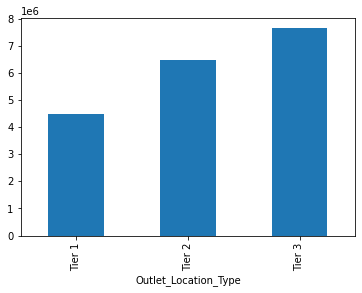

In [30]:
data.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].sum().plot(kind = 'bar')

Solution 2: From the above output,the outlet_location_type('Tier 1') makes the highest sales compared to the other cities. Based on my perspective, Tier 1 city might have the highest population or the economy in the city is well-okay.


# Question 3: Does the outlet_size have any impact on the overall sales?

I extracted the item_size column

In [34]:
data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3       Medium
4         High
         ...  
8518      High
8519    Medium
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

I groupby Outlet_Size and sum the Item_Outlet_Sales

In [36]:
data.groupby("Outlet_Size")["Item_Outlet_Sales"].sum()

Outlet_Size
High      2.142664e+06
Medium    1.188225e+07
Small     4.566212e+06
Name: Item_Outlet_Sales, dtype: float64

I groupby Outlet_Size and sum the Item_Outlet_Sales and used it to plot a bar graph

<AxesSubplot:xlabel='Outlet_Size'>

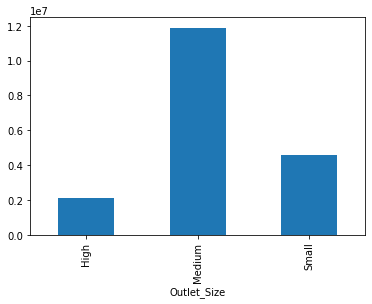

In [35]:
data.groupby("Outlet_Size")["Item_Outlet_Sales"].sum().plot(kind = 'bar')

Solution 3: From the above output, we can see that the medium-sized store makes the highest sales.

# Question 4: Which category of products sells the most and the least?

I extracted the item_type column

In [39]:
data["Item_Type"]

0                       Dairy
1                 Soft Drinks
2                        Meat
3       Fruits and Vegetables
4                   Household
                ...          
8518              Snack Foods
8519             Baking Goods
8520       Health and Hygiene
8521              Snack Foods
8522              Soft Drinks
Name: Item_Type, Length: 8523, dtype: object

I used value.counts() to counts the number of items inside the column and plotted a bar graph 

<AxesSubplot:>

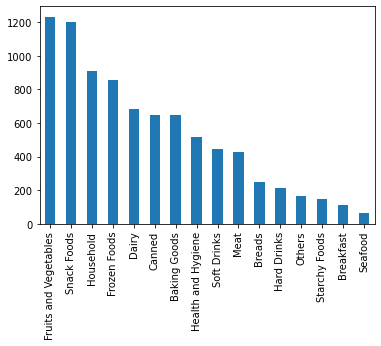

In [38]:
data.Item_Type.value_counts().plot(kind = 'bar')

Solution 4: From the above output,Fruits and Vegetables sells faster and the most.Based on my own perspective, people tend to eat fruits and vegetables on daily basis because it is healthy and highly nutrititous,while seafood on the otherhand, sells the least. This might be as a result of the fact that, seafoods takes time to prepared before consumption i.e it is time-consuming and most times,people do not really have time except it's weekends.

# Question 5: Do the product visiility and weight have impact on the sales of the product?

I extracted the item_weight column

In [16]:
data["Item_Weight"]


0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

I saved the output as data_w

In [17]:
data_w = data["Item_Weight"]


I extracted the item_outlet sales column

In [18]:
data["Item_Outlet_Sales"]

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

I saved the output as data_s

In [19]:
data_s =data["Item_Outlet_Sales"]

I plotted a scatterplot graph with data_w as my x-axis and data_s as my y-axis

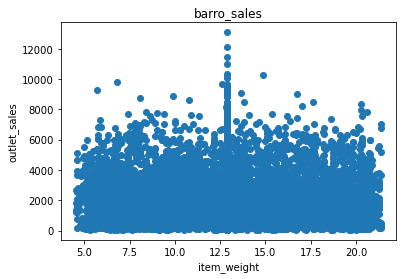

In [20]:
plt.scatter(data_w, data_s)
plt.xlabel("item_weight")
plt.ylabel("outlet_sales")
plt.title("barro_sales")
plt.show()

From the above output, the data is very spreaded, no specific pattern.

I extracted the item_visibility column

In [22]:
data["Item_Visibility"]

0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

I saved the output as data_v

In [45]:
data_v = data["Item_Visibility"]

I plotted a scatterplot graph with data_v as my x-axis and data_s as my y-axis

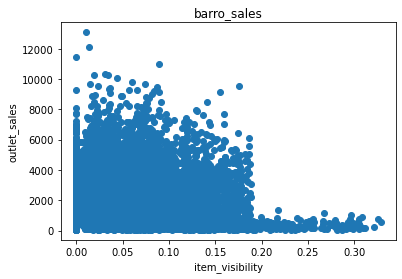

In [51]:
plt.scatter(data_v, data_s)
plt.xlabel("item_visibility")
plt.ylabel("outlet_sales")
plt.title("barro_sales")
plt.show()

Solution 5 :From the above output, the data appears to be spreaded as well but some concentration around (0, 0) indicate small visibility and based on my own perspective,item visibility is very important when it comes to making sales,customers are always attracted to what they see.

# Question 6:What is the average MRP of the product that sells the most and the least?

From solution to question 4, we realized that fruits and vegtables sells the most and seafood sells the least,so here,I extracted the all rows with fruits and vegetables

In [16]:
 data[data["Item_Type"].str.contains("Fruits and Vegetables")]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
10,FDY07,11.800000,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
12,FDX32,15.100000,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1999,Medium,Tier 1,Supermarket Type1,1589.2646
14,FDF32,16.350000,Low Fat,0.068024,Fruits and Vegetables,196.4426,OUT013,1987,High,Tier 3,Supermarket Type1,1977.4260
36,FDV20,12.857645,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
...,...,...,...,...,...,...,...,...,...,...,...,...
8490,FDU44,12.857645,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656
8497,FDT08,13.650000,Low Fat,0.049209,Fruits and Vegetables,150.0050,OUT035,2004,Small,Tier 2,Supermarket Type1,2247.0750
8503,FDQ44,20.500000,Low Fat,0.036133,Fruits and Vegetables,120.1756,OUT035,2004,Small,Tier 2,Supermarket Type1,3392.9168
8508,FDW31,11.350000,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,Medium,Tier 2,Supermarket Type1,2587.9646


Here,I extracted the all rows with fruits and vegetables and calculated the mean using mean()

In [40]:
 data[data["Item_Type"].str.contains("Fruits and Vegetables")].mean()

C:\Users\TITI ADEBOYE\AppData\Local\Temp\ipykernel_4660\100147589.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data["Item_Type"].str.contains("Fruits and Vegetables")].mean()


Item_Weight                    13.161297
Item_Visibility                 0.068513
Item_MRP                      144.581235
Outlet_Establishment_Year    1997.719968
Item_Outlet_Sales            2289.009592
dtype: float64

Here,I extracted the all rows with fruits and vegetables and calculated the mean using mean() and plotted a bar graph

C:\Users\TITI ADEBOYE\AppData\Local\Temp\ipykernel_4508\3641103939.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data["Item_Type"].str.contains("Fruits and Vegetables")].mean().plot(kind = 'bar')


<AxesSubplot:>

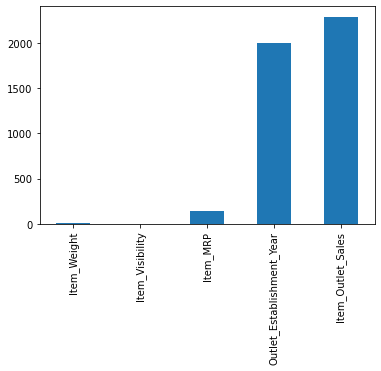

In [21]:
 data[data["Item_Type"].str.contains("Fruits and Vegetables")].mean().plot(kind = 'bar')

Here,I extracted the all rows with seafood 

In [37]:
 data[data["Item_Type"].str.contains("Seafood")]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
231,FDG33,12.857645,Regular,0.139561,Seafood,170.4764,OUT027,1985,Medium,Tier 3,Supermarket Type3,3435.5280
713,FDH21,10.395000,Low Fat,0.031274,Seafood,160.0604,OUT049,1999,Medium,Tier 1,Supermarket Type1,1267.6832
716,FDG21,17.350000,Regular,0.146896,Seafood,149.6050,OUT018,2009,Medium,Tier 3,Supermarket Type2,3745.1250
866,FDJ57,7.420000,Regular,0.021570,Seafood,184.8582,OUT035,2004,Small,Tier 2,Supermarket Type1,4643.9550
867,FDJ45,12.857645,Low Fat,0.073055,Seafood,33.7216,OUT027,1985,Medium,Tier 3,Supermarket Type3,1280.9992
...,...,...,...,...,...,...,...,...,...,...,...,...
8324,FDF33,7.970000,Low Fat,0.021579,Seafood,105.9596,OUT045,2002,Medium,Tier 2,Supermarket Type1,2049.3324
8328,FDI57,19.850000,Low Fat,0.054246,Seafood,196.0768,OUT018,2009,Medium,Tier 3,Supermarket Type2,5518.1504
8395,FDG21,17.350000,Regular,0.000000,Seafood,150.2050,OUT045,2002,Medium,Tier 2,Supermarket Type1,5992.2000
8423,FDJ57,7.420000,Regular,0.021662,Seafood,187.7582,OUT018,2009,Medium,Tier 3,Supermarket Type2,2600.6148


Here,I extracted the all rows with seafood and calculated the mean using mean()

In [39]:
 data[data["Item_Type"].str.contains("Seafood")].mean()

C:\Users\TITI ADEBOYE\AppData\Local\Temp\ipykernel_4660\449045584.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data["Item_Type"].str.contains("Seafood")].mean()


Item_Weight                    12.614756
Item_Visibility                 0.074976
Item_MRP                      141.841719
Outlet_Establishment_Year    1997.734375
Item_Outlet_Sales            2326.065928
dtype: float64

Here,I extracted the all rows with seafood and calculated the mean using mean() and plotted a bar graph

C:\Users\TITI ADEBOYE\AppData\Local\Temp\ipykernel_4660\446854121.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data["Item_Type"].str.contains("Seafood")].mean().plot(kind = 'bar')


<AxesSubplot:>

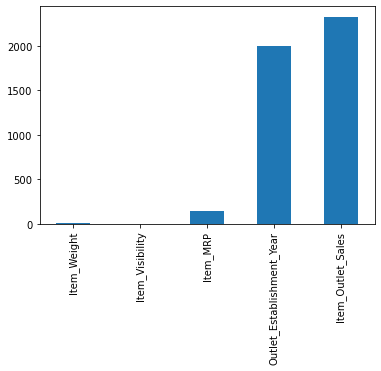

In [47]:
 data[data["Item_Type"].str.contains("Seafood")].mean().plot(kind = 'bar')

Solution 6: From the above output, we can see the average Item_MRP of fruits and vegetables is 144.581235 while the average Item_MRP of seafood is 141.841719.

# Qustion 7: What are some products that sells better in Tier 1 city as compared to Tier 2 and Tier 3 cities?

I extracted rows with Tier 1 city from the outlet_location_type

In [50]:
data[data["Outlet_Location_Type"].str.contains("Tier 1")]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
10,FDY07,11.800000,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
11,FDA03,18.500000,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530
12,FDX32,15.100000,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1999,Medium,Tier 1,Supermarket Type1,1589.2646
...,...,...,...,...,...,...,...,...,...,...,...,...
8480,FDQ58,12.857645,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8490,FDU44,12.857645,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656
8492,FDT34,9.300000,Low Fat,0.174350,Snack Foods,104.4964,OUT046,1997,Small,Tier 1,Supermarket Type1,2419.5172
8517,FDF53,20.750000,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360


I extracted rows with Tier 1 city from the outlet_location_type and used the max()

In [52]:
data[data["Outlet_Location_Type"].str.contains("Tier 1")].max()

Item_Identifier                          NCZ54
Item_Weight                              21.35
Item_Fat_Content                           reg
Item_Visibility                       0.328391
Item_Type                        Starchy Foods
Item_MRP                              266.8884
Outlet_Identifier                       OUT049
Outlet_Establishment_Year                 1999
Outlet_Size                              Small
Outlet_Location_Type                    Tier 1
Outlet_Type                  Supermarket Type1
Item_Outlet_Sales                    9779.9362
dtype: object

I extracted rows with Tier 1 city from the outlet_location_type and used the max() and this showed that starchy foods are best item sold in tier 1 city

For Tier 2 city: I extracted rows with Tier 2 city from the outlet_location_type

In [27]:
data[data["Outlet_Location_Type"].str.contains("Tier 2")]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350
19,FDU02,13.35,Low Fat,0.102492,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket Type1,2748.4224
22,NCB30,14.60,Low Fat,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672
25,NCD06,13.00,Low Fat,0.099887,Household,45.9060,OUT017,2007,Medium,Tier 2,Supermarket Type1,838.9080
...,...,...,...,...,...,...,...,...,...,...,...,...
8510,FDN58,13.80,Regular,0.056862,Snack Foods,231.5984,OUT035,2004,Small,Tier 2,Supermarket Type1,7182.6504
8513,FDH31,12.00,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,Medium,Tier 2,Supermarket Type1,468.7232
8519,FDS36,8.38,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850


I extracted rows with Tier 2 city from the outlet_location_type and used the max()

In [34]:
data[data["Outlet_Location_Type"].str.contains("Tier 2")].max()

Item_Identifier                          NCZ54
Item_Weight                              21.35
Item_Fat_Content                           reg
Item_Visibility                        0.18862
Item_Type                        Starchy Foods
Item_MRP                              266.8884
Outlet_Identifier                       OUT045
Outlet_Establishment_Year                 2007
Outlet_Size                              Small
Outlet_Location_Type                    Tier 2
Outlet_Type                  Supermarket Type1
Item_Outlet_Sales                    9664.7528
dtype: object

I extracted rows with Tier 2 city from the outlet_location_type and used the max() and this showed that starchy foods are best item sold in tier 2 city

For Tier 3 city: I extracted rows with Tier 3 city from the outlet_location_type

In [55]:
data[data["Outlet_Location_Type"].str.contains("Tier 3")]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
...,...,...,...,...,...,...,...,...,...,...,...,...
8512,FDR26,20.700,Low Fat,0.042801,Dairy,178.3028,OUT013,1987,High,Tier 3,Supermarket Type1,2479.4392
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834


I extracted rows with Tier 3 city from the outlet_location_type and used the max()

In [36]:
data[data["Outlet_Location_Type"].str.contains("Tier 3")].max()

Item_Identifier                          NCZ54
Item_Weight                              21.35
Item_Fat_Content                           reg
Item_Visibility                        0.31109
Item_Type                        Starchy Foods
Item_MRP                              266.6884
Outlet_Identifier                       OUT027
Outlet_Establishment_Year                 2009
Outlet_Size                             Medium
Outlet_Location_Type                    Tier 3
Outlet_Type                  Supermarket Type3
Item_Outlet_Sales                   13086.9648
dtype: object

I extracted rows with Tier 3 city from the outlet_location_type and used the max() and this showed that starchy foods are best item sold in tier 3 city

Solution 7:The best product sold in tier 1 which is starchy foods is best sold in tier 2 and tier 3 cities. For example, in Nigeria, starchy foods like rice , yam, garri are consumed on daily basis.

# Question 8: Are there any products selling better in Tier 2 and Tier 3 cities as compared to Tier 1 city?

solution 8:
The solution to question 7 answers question 8 also,starchy foods are best sold in tier 1, tier 2 and tier 3 cities